In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root="dataset", transform=transform)
loader = DataLoader(dataset, batch_size=4, shuffle=True)


In [3]:
for images, labels in loader:
    print(images.shape)  # e.g., [4, 3, 128, 128]
    print(labels)        # e.g., [0, 1, 0, 2]
    break

torch.Size([4, 3, 128, 128])
tensor([1, 1, 0, 0])


In [22]:
from PIL import Image
from torchvision import transforms
import torch

# Transform: resize + convert to tensor
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load first image
img1 = Image.open(r"C:\Users\MAINAK\Desktop\opencv\dataset\charts\page.png").convert("RGB")
tensor1 = transform(img1)  # shape: [3, 128, 128]

# Load second image
img2 = Image.open(r"C:\Users\MAINAK\Desktop\opencv\dataset\charts\page3.png").convert("RGB")
tensor2 = transform(img2)  # shape: [3, 128, 128]

img3 = Image.open(r"C:\Users\MAINAK\Desktop\opencv\dataset\charts\nc_page.png").convert("RGB")
tensor3 = transform(img3)


In [23]:
# Check difference
diff = tensor1 - tensor2
print("Number of pixels that changed:", (diff != 0).sum().item())
print("Shape of tensor:", tensor1.shape)


Number of pixels that changed: 1107
Shape of tensor: torch.Size([3, 128, 128])


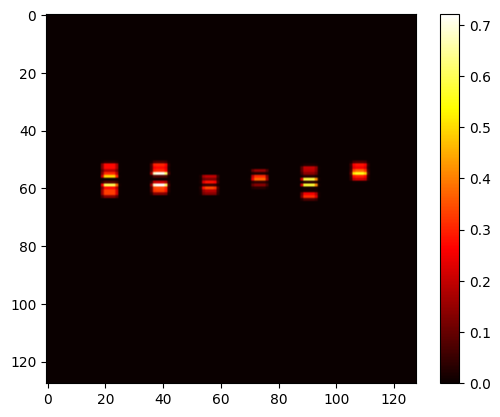

In [24]:
import matplotlib.pyplot as plt
diff2 = (tensor1 - tensor2).abs().sum(0)
plt.imshow(diff2, cmap='hot')
plt.colorbar()
plt.show()

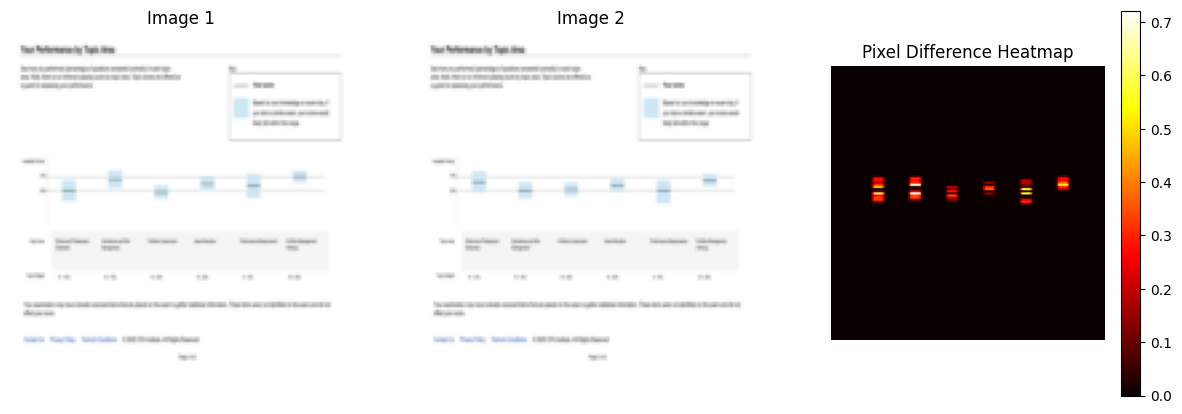

In [25]:
from PIL import Image
from torchvision import transforms
import torch
import matplotlib.pyplot as plt

# 1. Define transform
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# 2. Load images
img1 = Image.open(r"C:\Users\MAINAK\Desktop\opencv\datasetpy\charts\page.png").convert("RGB")
img2 = Image.open(r"C:\Users\MAINAK\Desktop\opencv\datasetpy\charts\page3.png").convert("RGB")

# 3. Convert to tensors
tensor1 = transform(img1)
tensor2 = transform(img2)

# 4. Compute absolute difference across channels
diff = (tensor1 - tensor2).abs().sum(0)  # sum over RGB channels

# 5. Plot original images and difference
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Image 1
axs[0].imshow(tensor1.permute(1, 2, 0))  # CHW -> HWC
axs[0].set_title("Image 1")
axs[0].axis('off')

# Image 2
axs[1].imshow(tensor2.permute(1, 2, 0))
axs[1].set_title("Image 2")
axs[1].axis('off')

# Difference heatmap
im = axs[2].imshow(diff, cmap='hot')
axs[2].set_title("Pixel Difference Heatmap")
axs[2].axis('off')
fig.colorbar(im, ax=axs[2])

plt.show()


In [ ]:
import cv2
import numpy as np

# 1. Load image (crop the bar region if needed)
img = cv2.imread(r"C:\Users\MAINAK\Desktop\opencv\datasetpy\charts\line_chart.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Threshold to find the line (assuming dark line on light background)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# 3. Find the line pixels (y-coordinates)
ys, xs = np.where(thresh == 255)
line_y = ys.mean()  # average y-coordinate of the line

# 4. Calculate percentage
height = img.shape[0]
percentage = 100 * (height - line_y) / height  # line from bottom
print(f"Score Percentage: {percentage:.2f}%")


In [2]:
from skimage.metrics import structural_similarity as ssim
import cv2

def find_best_match(template_path, image_paths):
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    best_score = -1
    best_image = None
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        score = ssim(template, img)
        if score > best_score:
            best_score = score
            best_image = path
    return best_image


In [ ]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
ys, xs = np.where(thresh == 255)
width = xs.max() - xs.min()
# choose the image with largest width → likely the main bar chart
